In [1]:
#%pip install imageio == 2.4.1
#%pip install gym
#%pip install pygame
#%pip install opencv-python
#%pip install matplotlib

In [1]:
# Setup Environment
import sys
sys.path.append("../")

import gym
import numpy as np
from gym.wrappers.monitoring.video_recorder import VideoRecorder
from IPython.display import HTML
from source.dyna_q_agent import DynaQAgent
from source.utils import *


test_dyna_q_agent passed!


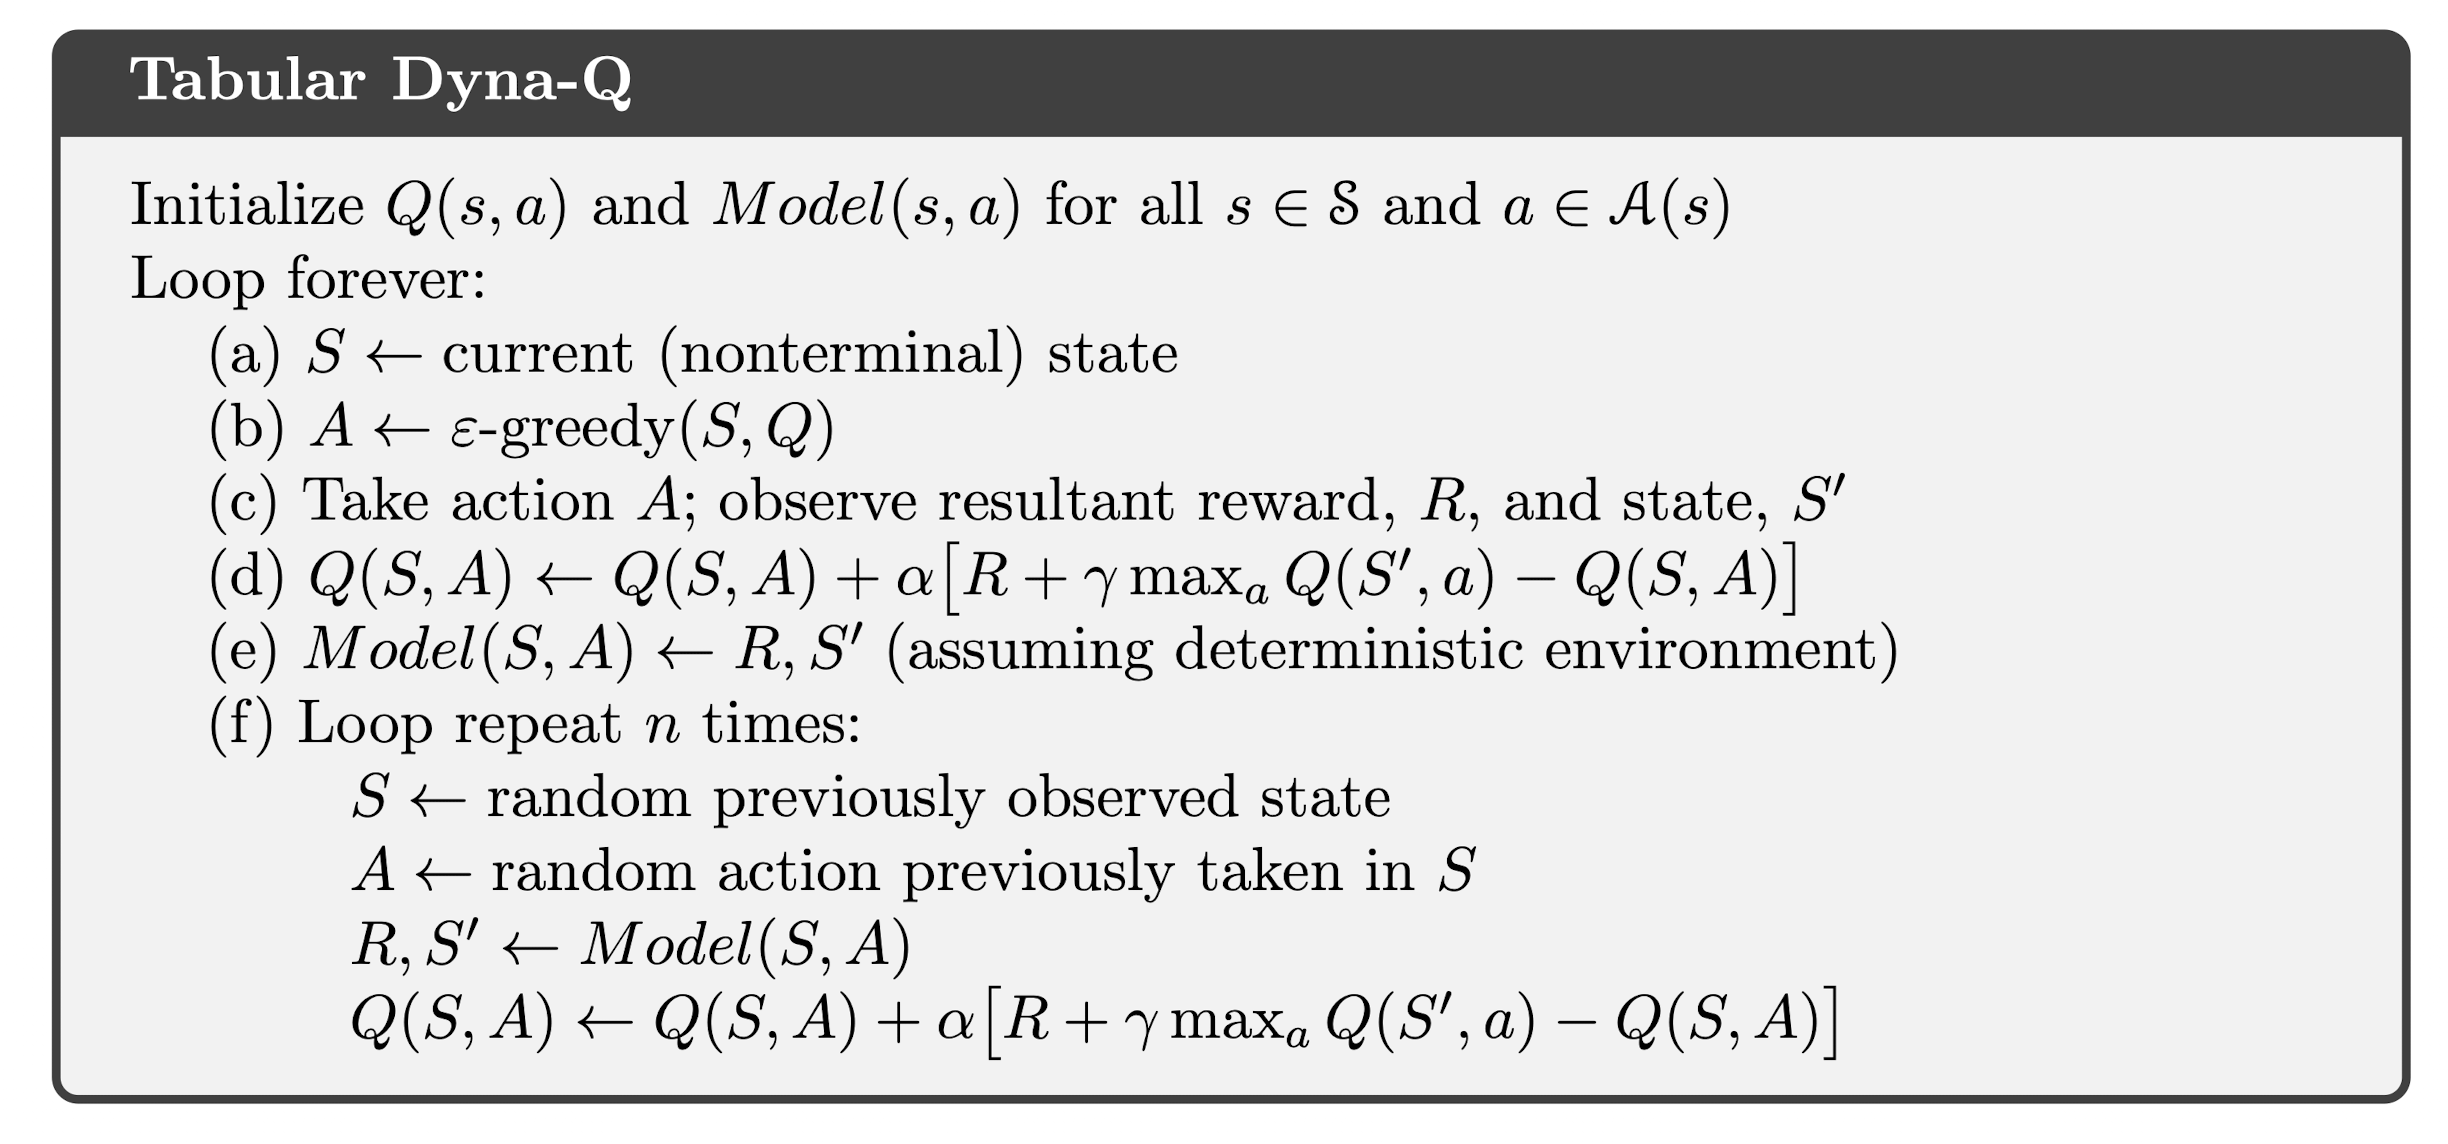

step: 100, total reward: 18.0, avarage reward per step: 0.017283950617283952
step: 200, total reward: 77.0, avarage reward per step: 0.0333170890188434
step: 300, total reward: 161.0, avarage reward per step: 0.036560855661302856
step: 400, total reward: 230.0, avarage reward per step: 0.03878153515834675
step: 500, total reward: 311.0, avarage reward per step: 0.03617868489703582
step: 600, total reward: 388.0, avarage reward per step: 0.039647832412672904
step: 700, total reward: 471.0, avarage reward per step: 0.03677442268773538
step: 800, total reward: 549.0, avarage reward per step: 0.04171655991831431
step: 900, total reward: 630.0, avarage reward per step: 0.036926807760141095

rewarding episodes: 704.0
Moviepy - Building video ../video/dyna_q.mp4.
Moviepy - Writing video ../video/dyna_q.mp4



Moviepy - Done !
Moviepy - video ready ../video/dyna_q.mp4


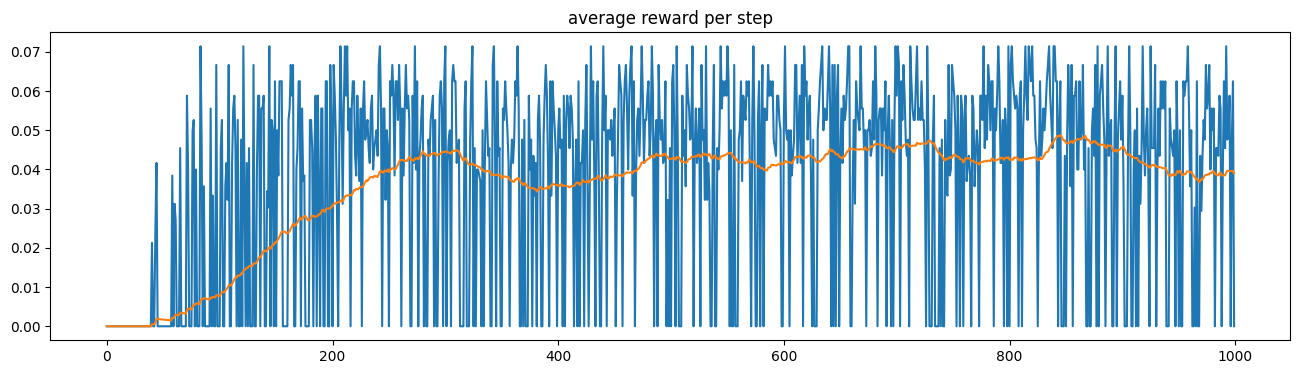

In [3]:
# Policy Eval
# Params
max_episode = 1000
video_path = "../video/dyna_q.mp4"
random_seed = 101

# Initialize
history = []
total_reward = 0
# set random seeds
rng = np.random.default_rng(random_seed)
np.random.seed(random_seed)


# Create Environment.
#env = gym.make('Taxi-v3')
# using render_mode=rgb_array so that video recording works
env = gym.make('FrozenLake-v1', desc=None, map_name="8x8",
               is_slippery=False, render_mode='rgb_array')
env.np_random = rng
video = VideoRecorder(env, video_path)

# Create Agent
agent = DynaQAgent(
    state_space=env.observation_space,
    action_space=env.action_space,
    discount_rate=0.9,
    epsilon=0.3,
    step_size=0.5,
    agent_type='expected_sarsa',
    planning_steps=0
)

# Start Eval
for i in range(max_episode):
    reward, steps = agent.play_episode(env)
    history.append(reward / steps)
    total_reward += reward
    if i % 100 == 0 and i != 0:
        print(
            f"step: {i}, total reward: {total_reward}, avarage reward per step: {np.mean(history[-10:-1])}")
print(f"\nrewarding episodes: {total_reward}")

# For off policy learing only: get greedy policy (no exploration)
agent._policy = get_epsilon_greedy_policy_from_action_values(agent._Q)
# play last episode with video recording
agent.play_episode(env, learning=False, video=video)
video.close()

plot_history(history)
html=render_mp4(video_path)
HTML(html)

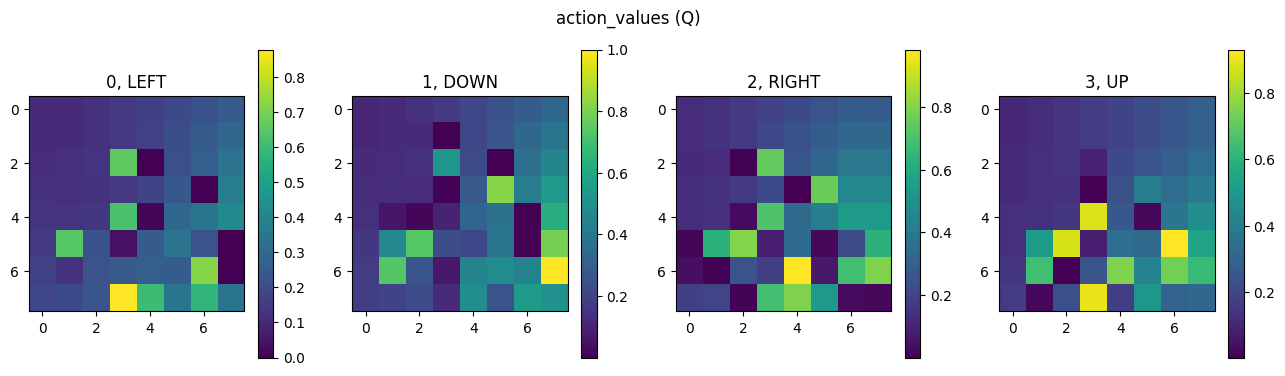

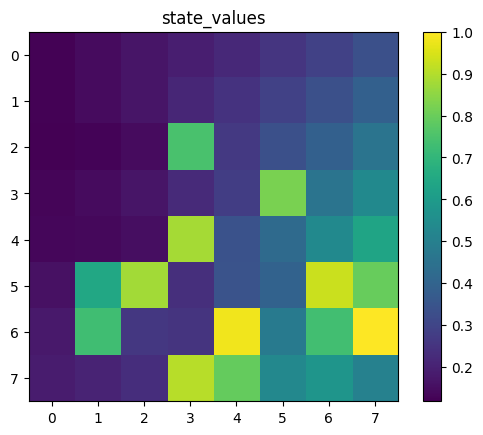

In [4]:
show_state_action_values(agent, 'frozen_lake_8x8')